# OLG Economy (Diamond Model)

The Overlapping Generations (OLG) Diamond model, developed by Peter Diamond in the 1960s, is a widely used framework in economics to examine intergenerational dynamics and various economic phenomena. This model offers valuable insights into the interactions between different generations, capital accumulation, and economic growth.

One key feature of the OLG Diamond model is its intergenerational aspect. The model assumes that individuals are born into the young generation and progress through the life cycle. When individuals reach the old stage, they retire and transfer their accumulated wealth to the next generation. This intergenerational transfer mechanism is a fundamental aspect of the model and plays a crucial role in determining economic outcomes and welfare.

We will investigate how households optimize their consumption, saving, and labor supply decisions over their lifetimes. By examining the equilibrium conditions of the model, we aim to understand the factors that drive consumption, savings, and welfare outcomes in an OLG Diamond framework.

Within the model, household utility is given by:

$$ U = \ln(c_{1t}) + \beta \ln(c_{2t+1}), \beta \in [0,1]$$

The single period dynamic budget constraints are:

$$ c_{1t} = w_t - s_t $$
$$ c_{2t+1} = (1+r_{t+1}) s_t $$

The intertemporal Budget Constraint (IBC) is:

$$ c_{1t} + \frac{c_{2t+1}}{1+r_{t+1}} = w_t $$



We start off by importing all the relevant packages for our analysis

In [2]:
import numpy as np
from scipy import optimize
import sympy as sm
sm.init_printing(use_unicode=True)

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from matplotlib import cm
import ipywidgets as widgets

C:\Users\click\AppData\Local\Temp\ipykernel_4592\3595149395.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


We now define all the variables and parameters wich we make use of within the model. 

In [3]:
# Variables and parameters from utility function
C1t = sm.symbols('C_1t')
C2t_1 = sm.symbols('C_2t+1')
U_t = sm.symbols('U_t')

# Variables and parameters from budget constraint and period constraints
alpha = sm.symbols('alpha')
beta = sm.symbols('beta')
w_t = sm.symbols('w_t')
k_t = sm.symbols('k_t')
r_t = sm.symbols('r_t')
r_t1 = sm.symbols('r_t+1')

A = sm.symbols('A') 
St = sm.symbols('S_t') 
s = sm.symbols('s(r_t+1)') 
yt = sm.symbols('y_t')


In [4]:
# Defining utility function and constraints
U = sm.log(C1t) + beta * sm.log(C2t_1)
cons1 = sm.Eq(C1t + St, w_t)
cons2 = sm.Eq(C2t_1, (1+r_t1)*St)

# To find one budget constraint we solve for s_t:
st_from_cons2 = sm.solve(cons2, St)
cons1_with_st = cons1.subs(St, st_from_cons2[0])

print('Budget constraints are given as:')
display(cons1)
display(cons2)
print('Then we combine the constraints:')
display(cons1_with_st)




Budget constraints are given as:


Then we combine the constraints:


optimal Consumption in period 1:


optimal Consumption in period 2:


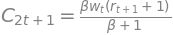

Euler Equation:


In [6]:
# We solve for C2_t+1 and substitute its value into the utility function
C2t_1_from_cons = sm.solve(cons1_with_st, C2t_1)
obj_subs = U.subs(C2t_1, C2t_1_from_cons[0])

# We calculate the optimal value of C1t
foc1 = sm.diff(obj_subs, C1t)
solve_1 = sm.solve(sm.Eq(foc1, 0), C1t)
opt_c1t = sm.Eq(C1t, solve_1[0])

# We solve for C_1t and substitute its value into the utility function
c1t_from_cons = sm.solve(cons1_with_st, C1t)
obj_subs = U.subs(C1t, c1t_from_cons[0])

# Calculate the optimal value of C2t_1
foc2 = sm.diff(obj_subs, C2t_1)
solve_2 = sm.solve(sm.Eq(foc2, 0), C2t_1)
opt_c2t1 = sm.Eq(C2t_1, solve_2[0])

# We find the euler equation
euler = solve_2[0]/solve_1[0]
euler_eq = sm.Eq(C2t_1/C1t, euler)

# print the results
print('optimal Consumption in period 1:')
display(opt_c1t)
print('optimal Consumption in period 2:')
display(opt_c2t1)
print('Euler Equation:')
display(euler_eq)



The Euler equation represents the intertemporal trade-off between consumption in two time periods.
It shows how the marginal utility of consumption in period 1 is related to the marginal utility inm period 2.
It expresses the equilibrium condition in the Diamond overlapping generations (OLG) model.

Saving Equation:


Insert optimal first period consumption:


Simplify:


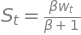

In [9]:
# Optimal savings calculations
savings_P1 = sm.solve(cons1, St)
savings_P1_eq = sm.Eq(St, savings_P1[0])
savings = savings_P1_eq.subs(C1t, solve_1[0])
simple_savings = sm.simplify(savings)

# print results
print('Saving Equation:')
display(savings_P1_eq)
print('Insert optimal first period consumption:')
display(savings)
print('Simplify:')
display(simple_savings)


From the savings equation we can see that savings is not dependent on $ r_{t+1} $. Savings is solely dependent on the income received in period, aswell as the impatience parameter $\beta$.  Now that we have derived household behavior in this economy, we can derive the production side, and how the economy develoopes through time - capital accumulation. Lastly we can derive the steady state dynamics of this economy. 

In [10]:
# We define the production function using total factor productivity (TFP) and capital.
f = A*k_t**alpha
print('production function:')
display(sm.Eq(yt, f))

production function:


In [11]:
# We derive the interest rate 
interest_rate = sm.diff(f,k_t)
interest_rate = sm.simplify(interest_rate)
print('Interest Rate:')
display(sm.Eq(r_t,interest_rate))

Interest Rate:


In [13]:
# We derive the wage rate
wage = f-sm.diff(f,k_t)*k_t
wage = sm.simplify(wage)
print('Wage Rate per Unit of Effective Labor:')
display(sm.Eq(w_t,wage))

Wage Rate per Unit of Effective Labor:


Transition Equation:


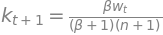

In [14]:
# We derive the transition equation
kt1 = sm.symbols('k_t+1')

g = sm.symbols('g')
n = sm.symbols('n')

transition_int = sm.Eq(kt1, 1/(1+n) * beta/(1+beta) *w_t)
print('Transition Equation:')
display(transition_int)

Transition Equation with Saving and Wage rates plugged-in:


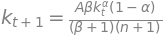

In [15]:
# Insert savinmgs and wage rate
transition_int2 = transition_int.subs(w_t,wage)
print('Transition Equation with Saving and Wage rates plugged-in:')
display(transition_int2)

In SS k is constant:


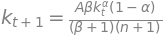

In [20]:
# We derive the staeady state level of capital accumulation
steady_state = transition_int2.subs(kt1,k_t)
print('In SS k is constant:')
display(steady_state)

Steady-State k:


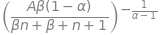

In [17]:
k_steady_state = sm.solve(steady_state,k_t)[0]
print('Steady-State k:')
display(k_steady_state)

We now illustrate how this economy transitions towards its steady state level of capital accumulation.

<function matplotlib.pyplot.show(close=None, block=None)>

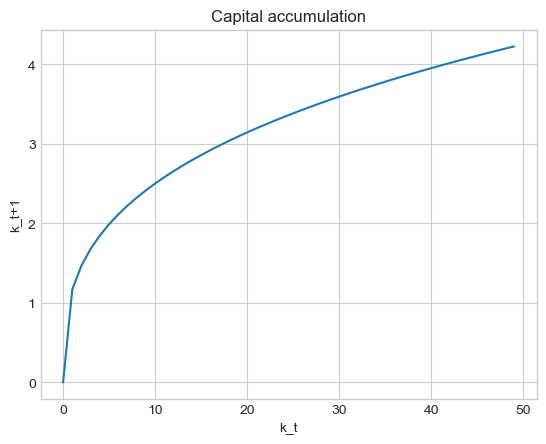

In [21]:
#Define parameters
alpha = 0.33
beta = 0.22
tau = 0.18
A = 10
n = 0.04

#we let $k_t$ be in [0,50]
k_t = np.linspace(0,50)

#We define capital accumulation and steady state
k_t1 = (A*beta*k_t**alpha*(1-alpha))/((beta+1)*(1+n))

ss_k = ((A*beta*(1-alpha))/(beta*n + beta + n +1)**(-1/(alpha-1)))

plt.plot(k_t1)
plt.title('Capital accumulation')
plt.ylabel('k_t+1')
plt.xlabel('k_t')
plt.show

In [19]:
# What is the steady state level of capital?
print('steady state:')
print(ss_k)

steady state:
1.0331879190712787


In conclusion, the general Diamond Overlapping Generations (OLG) model captures intergenerational dynamics and explores the implications of individual decisions on savings, consumption, and capital accumulation over time. The model's dynamics reveal how various factors interact to shape the long-term outcomes of an economy. At the core of the model are intergenerational transfers, where individuals save in the first period and pass on their savings as capital to the next generation. This transfer of resources affects both the level of capital accumulation and the welfare of different generations. Savings decisions are key drivers of the model's dynamics, as individuals choose how much to consume in the current period and how much to save for the next period. The intertemporal trade-offs inherent in the Diamond OLG model play a vital role. Individuals must weigh their preferences for present versus future consumption, considering factors such as time preferences, discount rates, and expectations of future income and returns. These trade-offs influence savings decisions and shape the accumulation of capital, which, in turn, affects productivity, output, and future consumption possibilities.

Achieving equilibrium is essential in the model, where individual choices align with market conditions. Equilibrium conditions such as the intertemporal budget constraint, production function, and factor prices play a role in ensuring consistency across generations. Market forces and incentives drive the interplay between savings and investment, enabling the allocation of resources and balancing the economy. The Diamond OLG model also has important policy implications. It allows for the analysis of various policy interventions on savings, capital accumulation, and intergenerational welfare. By exploring changes in tax policy, social security systems, retirement age, or educational investments, policymakers can assess the long-term consequences of policy choices and their impact on future generations' well-being.